In [78]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib

提取数据

In [79]:
path = 'data/ex7data1.mat'
data = sio.loadmat(path)
X = data['X']

编写画出数据图像的函数

In [80]:
def plot(X, color, fig, ax):
    ax.scatter(X[:, 0], X[:, 1], marker= 'o', c='',edgecolors= color)

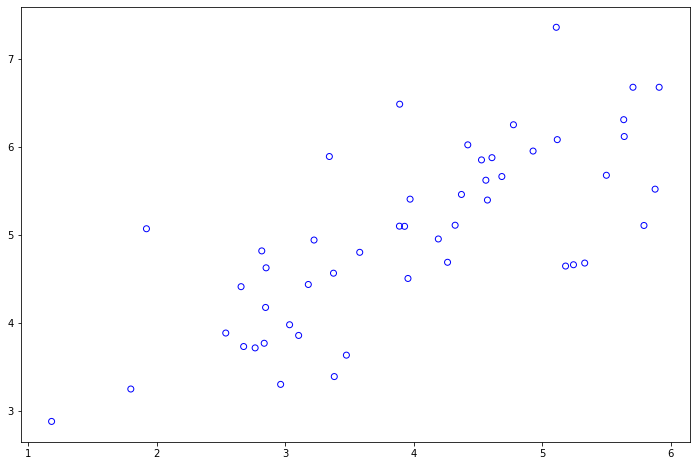

In [81]:
fig, ax = plt.subplots(figsize= (12,8))
plot(X, 'blue', fig, ax)
plt.show()

编写归一化函数和协方差矩阵

In [82]:
def normalize(X):
    X_copy = X.copy()
    for i in range(X_copy.shape[1]):
        X_copy[:, i] = (X_copy[:, i] - np.mean(X_copy[:, i])) / X_copy[:, i].std()
    return X_copy


def covariance_matrix(X):
        m = X.shape[0]
        return (X.T @ X) / m 

#测试函数功能
# hah = normalize(X)
# print(hah)


编写PCA降维函数， 以及PCA回复函数

In [83]:
def reduce(X_normalize, K):
    Sigma = covariance_matrix(X_normalize)
    U, S, V = np.linalg.svd(Sigma)
    U_reduce = U[:, 0:K]
    Z = X_normalize @ U_reduce
    return Z

def recoverData(Z, X_normalize, K):
    Sigma = covariance_matrix(X_normalize)
    U, S, V = np.linalg.svd(Sigma)
    U_reduce = U[:, 0:K]
    X_recover = Z @ U_reduce.T
    return X_recover

可视化PCA降维以及PCA回复得到过程

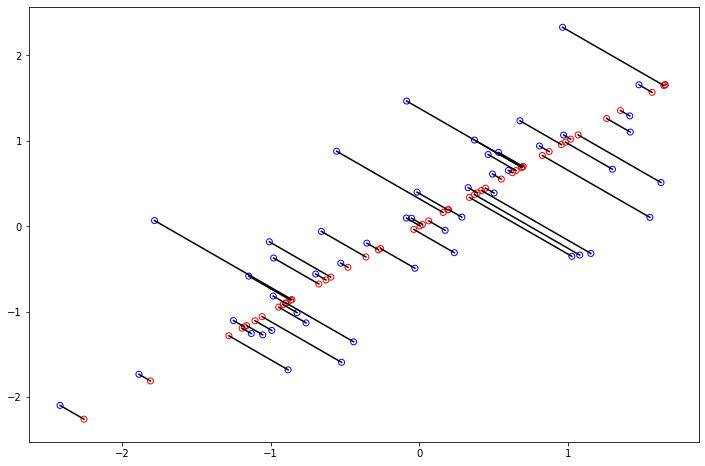

In [84]:
fig, ax = plt.subplots(figsize= (12,8))
X_normalize = normalize(X)
plot(X_normalize, 'blue', fig, ax)

K= 1

#得到降至K维的数组Z
Z = reduce(X_normalize, K)

#得到得到恢复至原来维数的数组X_recover
X_recover = recoverData(Z, X_normalize, K)

plot(X_recover, 'red', fig, ax)
for i in range(X.shape[0]):
    range_X = (X_normalize[i][0], X_recover[i][0])
    range_Y = (X_normalize[i][1], X_recover[i][1])
    plt.plot(range_X, range_Y, c= 'black')

    

plt.show()

提取face的数据

In [85]:
face_path = 'data/ex7faces.mat'
data_face = sio.loadmat(face_path)
X_face = data_face['X']

编写显示100张脸的函数

In [86]:
def plot_faces(X, num):
    size = int(np.sqrt(X.shape[1]))
    row_cols = int(np.sqrt(num))
    fig, ax = plt.subplots(nrows= row_cols, ncols= row_cols, sharex= True, sharey= True, figsize= (8,8))
    for i in range(row_cols):
        for j in range(row_cols):
            ax[i, j].matshow(X[row_cols * i + j].reshape((size, size)).T, 
                             cmap= 'gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            

In [87]:
#plot_faces(X_face, 4)

对脸进行降维操作

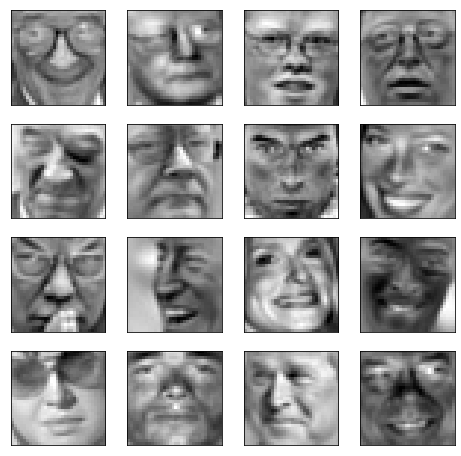

In [88]:
X_face_norm = normalize(X_face)
K_face = 625
Z_face = reduce(X_face_norm, K_face)
X_rec  = recoverData(Z_face, X_face_norm, K_face)
#plot_faces(X_face_norm, 16)
plot_faces(X_rec, 16)
